### Importing Required Packages

In [123]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Loading the Dataset

In [124]:
df = pd.read_csv("datasets/inventory_data_noisy.csv")

In [125]:
df.head()

,Dealer_ID,Product_ID,Date,Quantity,Consumption,Location
0,D000,P000,2022-01-01,62.0,8.0,Chicago
1,D000,P000,2022-01-02,70.0,9.0,Chicago
2,D000,P000,2022-01-03,12.0,17.0,Los Angeles
3,D000,P000,2022-01-04,74.0,13.0,Los Angeles
4,D000,P000,2022-01-05,57.0,10.0,Los Angeles


In [126]:
df.shape

(18360, 6)

In [127]:
df.isna().sum()

Dealer_ID        0
Product_ID       0
Date             0
Quantity        92
Consumption     92
Location       184
dtype: int64

In [128]:
df['Quantity'].fillna(df['Quantity'].mean(),inplace=True)
df['Consumption'].fillna(df['Consumption'].mean(),inplace=True)
df.isna().sum()

Dealer_ID        0
Product_ID       0
Date             0
Quantity         0
Consumption      0
Location       184
dtype: int64

In [129]:
df['Location'].fillna(df['Location'].mode()[0],inplace=True)
df.isna().sum()

Dealer_ID      0
Product_ID     0
Date           0
Quantity       0
Consumption    0
Location       0
dtype: int64

In [130]:
df.duplicated().sum()

np.int64(349)

In [131]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18011 entries, 0 to 18343
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Dealer_ID    18011 non-null  object 
 1   Product_ID   18011 non-null  object 
 2   Date         18011 non-null  object 
 3   Quantity     18011 non-null  float64
 4   Consumption  18011 non-null  float64
 5   Location     18011 non-null  object 
dtypes: float64(2), object(4)
memory usage: 985.0+ KB


In [133]:
df.nunique()

Dealer_ID      10
Product_ID     20
Date           90
Quantity       92
Consumption    17
Location        3
dtype: int64

In [134]:
df.describe()

,Quantity,Consumption
count,18011.000000,18011.000000
mean,59.231732,12.952437
std,71.490048,13.394357
min,10.000000,5.000000
25%,32.000000,8.000000
50%,55.000000,12.000000
75%,77.000000,16.000000
max,990.000000,190.000000


Text(0.5, 1.0, 'Distribution of Consumption')

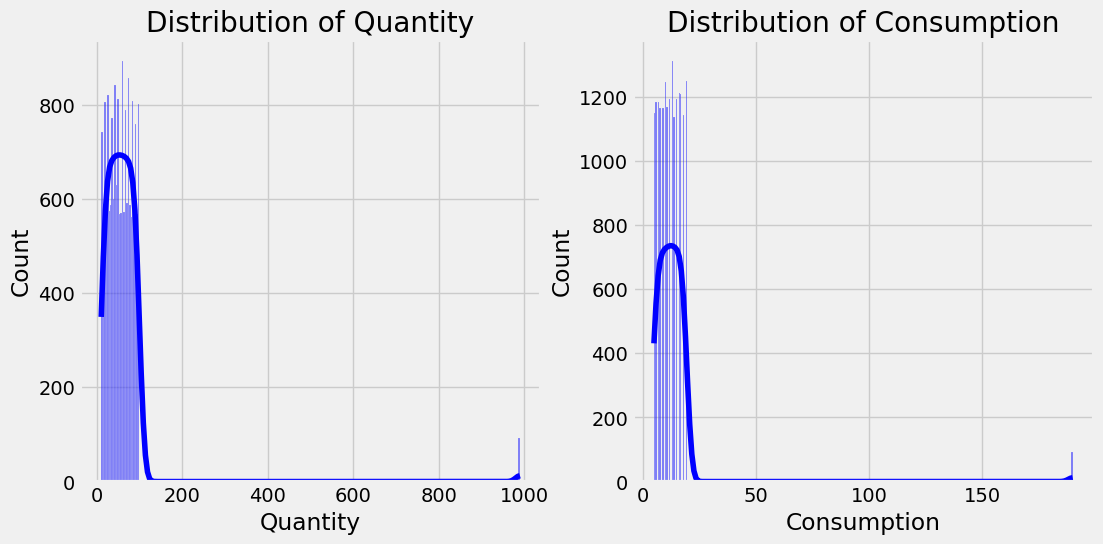

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns
df_eda = df

plt.figure(figsize=(18, 12))
plt.subplot(2, 3, 1)
sns.histplot(df_eda['Quantity'], kde=True, color='blue')
plt.title('Distribution of Quantity')

plt.subplot(2, 3, 2)
sns.histplot(df_eda['Consumption'], kde=True, color='blue')
plt.title('Distribution of Consumption')

Text(0.5, 1.0, 'Boxplot of Consumption')

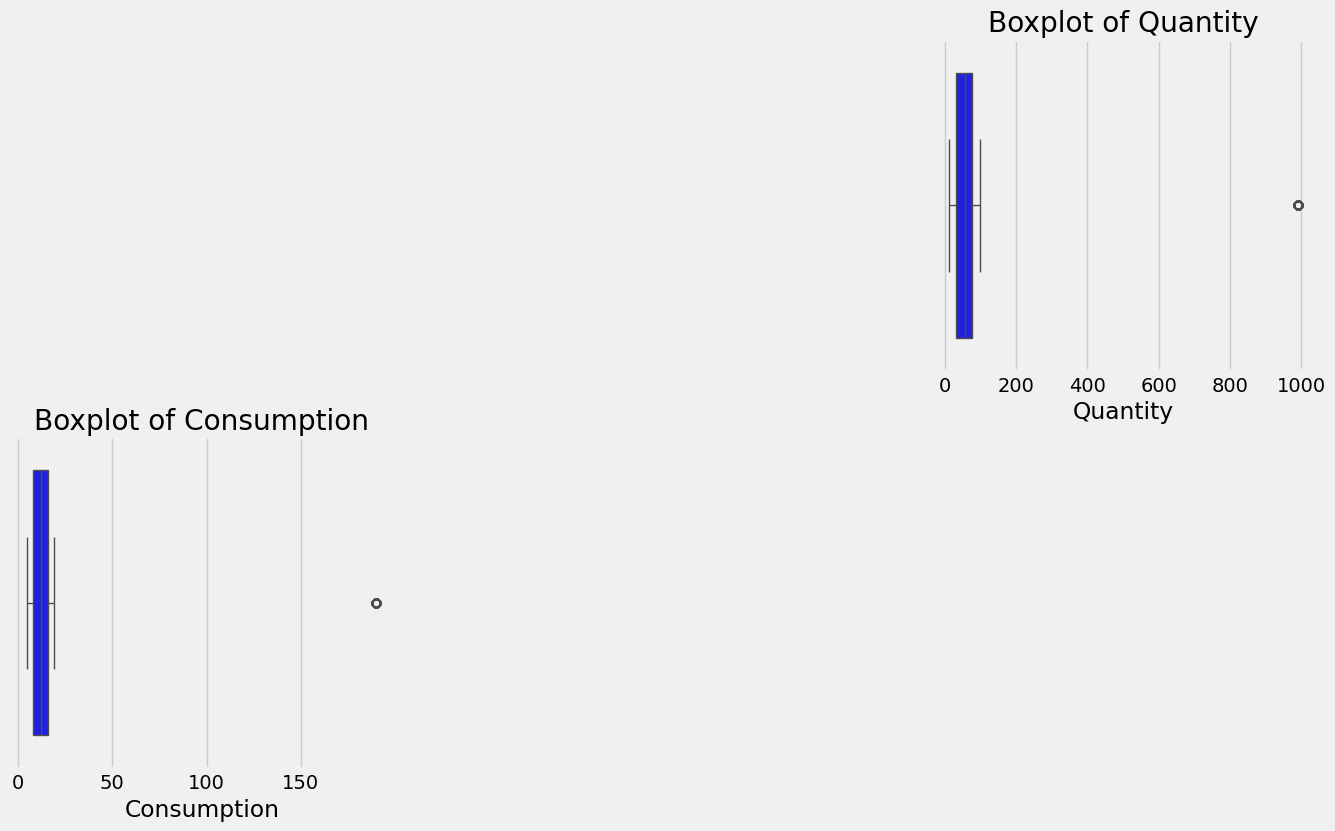

In [136]:
plt.subplot(2, 3, 3)
sns.boxplot(data=df_eda, x='Quantity', color='blue')
plt.title('Boxplot of Quantity')

plt.subplot(2, 3, 4)
sns.boxplot(data=df_eda, x='Consumption', color='blue')
plt.title('Boxplot of Consumption')

In [137]:
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df

columns_to_filter = ["Quantity", "Consumption"]  
df= remove_outliers_iqr(df, columns_to_filter)

Text(0.5, 1.0, 'Distribution of Consumption')

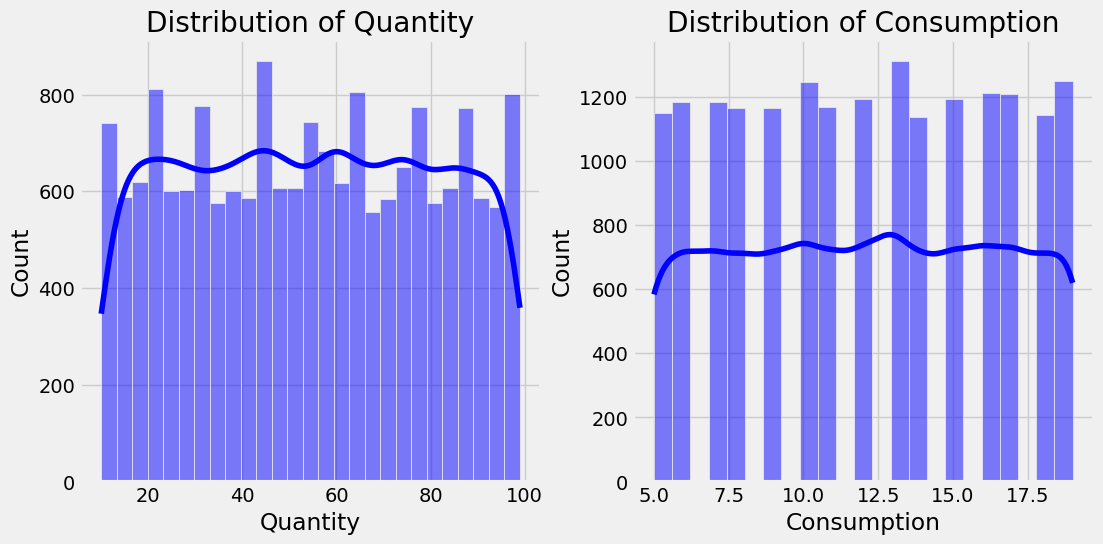

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns
df_eda = df

plt.figure(figsize=(18, 12))

plt.subplot(2, 3, 1)
sns.histplot(df_eda['Quantity'], kde=True, color='blue')
plt.title('Distribution of Quantity')

plt.subplot(2, 3, 2)
sns.histplot(df_eda['Consumption'], kde=True, color='blue')
plt.title('Distribution of Consumption')

Text(0.5, 1.0, 'Boxplot of Consumption')

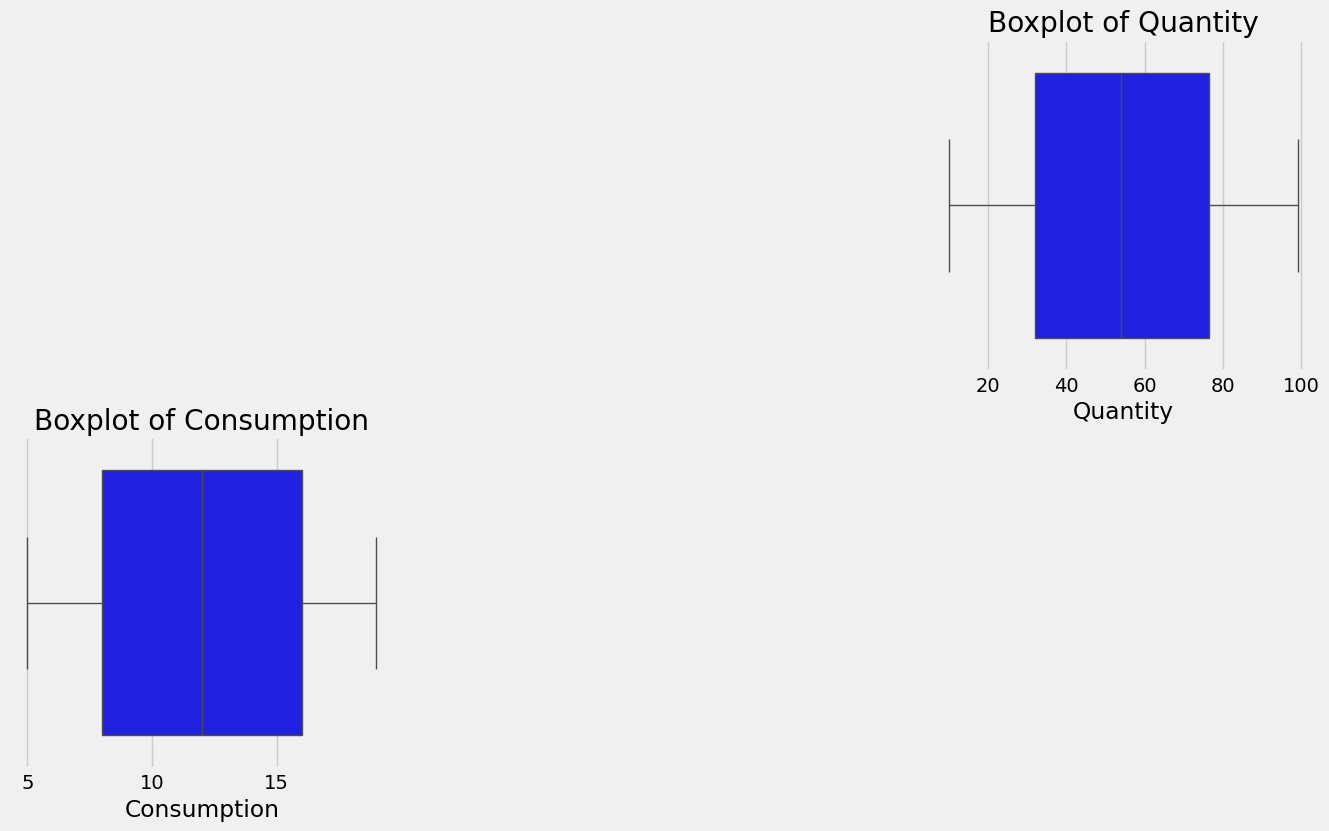

In [139]:
plt.subplot(2, 3, 3)
sns.boxplot(data=df, x='Quantity', color='blue')
plt.title('Boxplot of Quantity')

plt.subplot(2, 3, 4)
sns.boxplot(data=df, x='Consumption', color='blue')
plt.title('Boxplot of Consumption')

In [140]:
print("Categories in 'Dealer_ID' variable:     ",end=" " )
print(df['Dealer_ID'].unique())

print("Categories in 'Product_ID' variable:  ",end=" ")
print(df['Product_ID'].unique())

print("Categories in'Location' variable:",end=" " )
print(df['Location'].unique())


Categories in 'Dealer_ID' variable:      ['D000' 'D001' 'D002' 'D003' 'D004' 'D005' 'D006' 'D007' 'D008' 'D009']
Categories in 'Product_ID' variable:   ['P000' 'P001' 'P002' 'P003' 'P004' 'P005' 'P006' 'P007' 'P008' 'P009'
 'P010' 'P011' 'P012' 'P013' 'P014' 'P015' 'P016' 'P017' 'P018' 'P019']
Categories in'Location' variable: ['Chicago' 'Los Angeles' 'New York']


In [141]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 2 numerical features : ['Quantity', 'Consumption']

We have 4 categorical features : ['Dealer_ID', 'Product_ID', 'Date', 'Location']


In [142]:
low_threshold = df["Consumption"].quantile(0.33)
high_threshold = df["Consumption"].quantile(0.66)

In [143]:
def categorize_consumption(value):
    if value <= low_threshold:
        return "Low"
    elif value <= high_threshold:
        return "Medium"
    else:
        return "High"

df["Consumption_Level"] = df["Consumption"].apply(categorize_consumption)

df['Quantity_consumption_ratios'] = df['Quantity']/df['Consumption']

In [144]:
df.head()

,Dealer_ID,Product_ID,Date,Quantity,Consumption,Location,Consumption_Level,Quantity_consumption_ratios
0,D000,P000,2022-01-01,62.0,8.0,Chicago,Low,7.750000
1,D000,P000,2022-01-02,70.0,9.0,Chicago,Low,7.777778
2,D000,P000,2022-01-03,12.0,17.0,Los Angeles,High,0.705882
3,D000,P000,2022-01-04,74.0,13.0,Los Angeles,Medium,5.692308
4,D000,P000,2022-01-05,57.0,10.0,Los Angeles,Low,5.700000


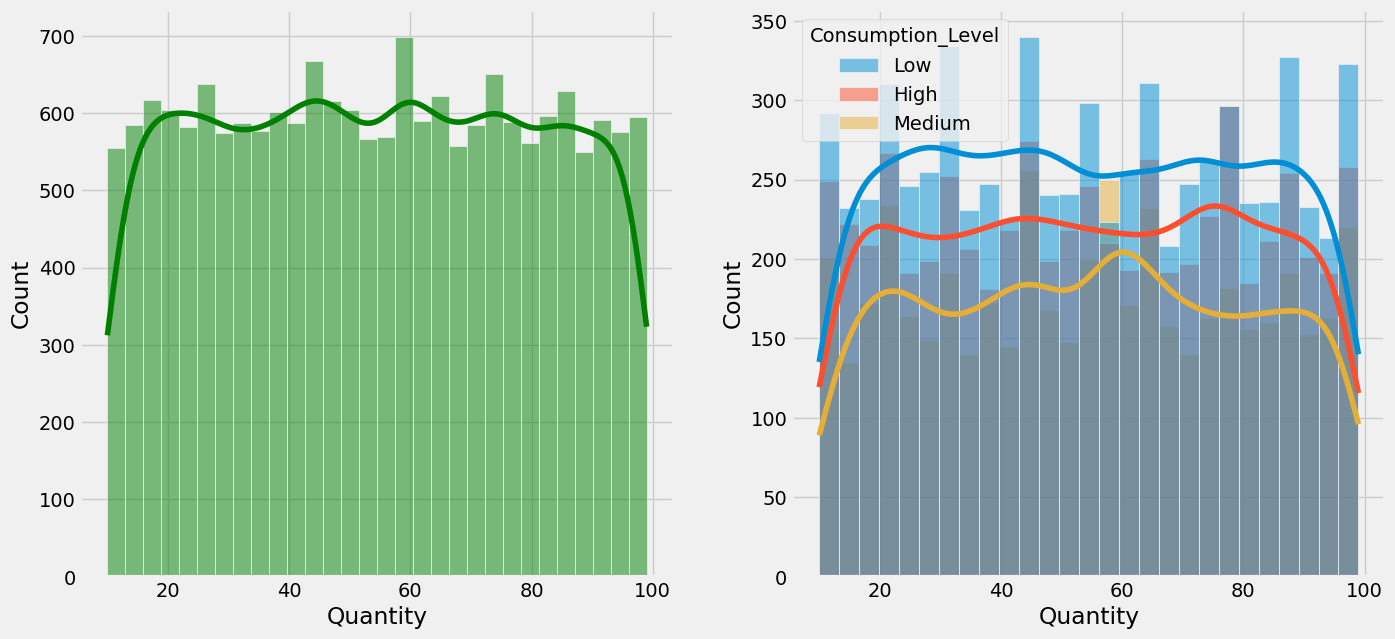

In [145]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Quantity',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Quantity',kde=True,hue='Consumption_Level')
plt.show()

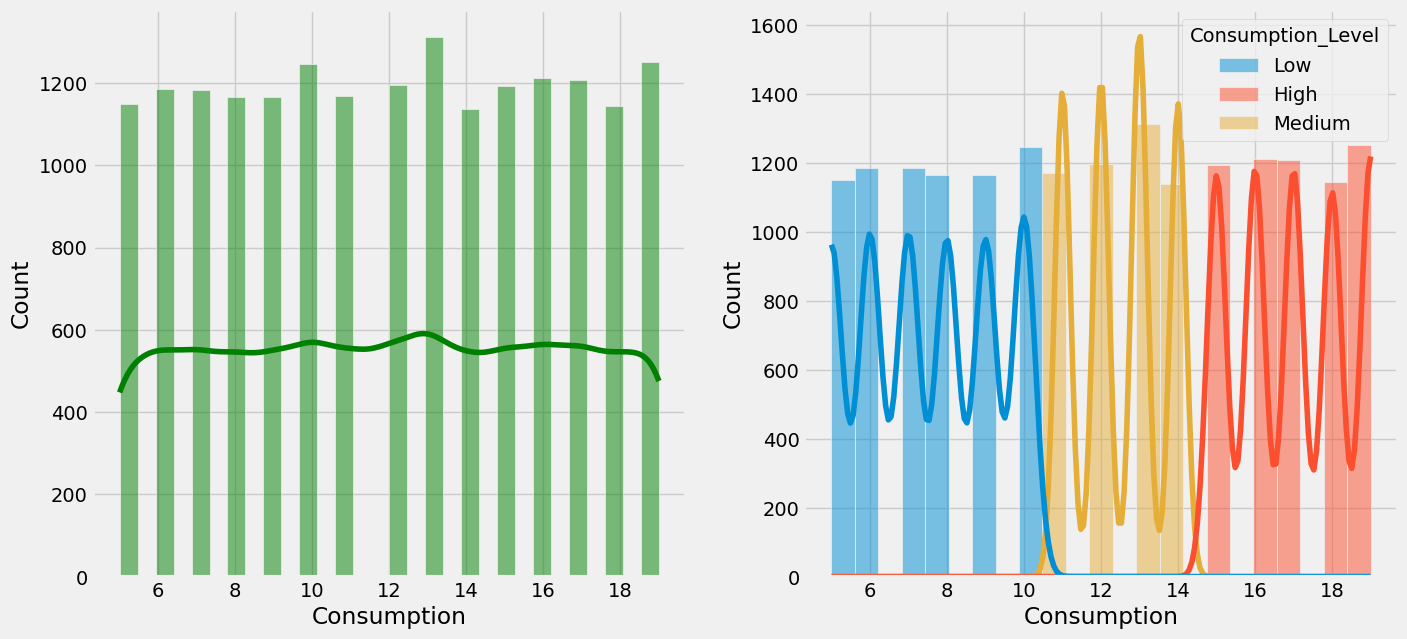

In [146]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Consumption',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Consumption',kde=True,hue='Consumption_Level')
plt.show()

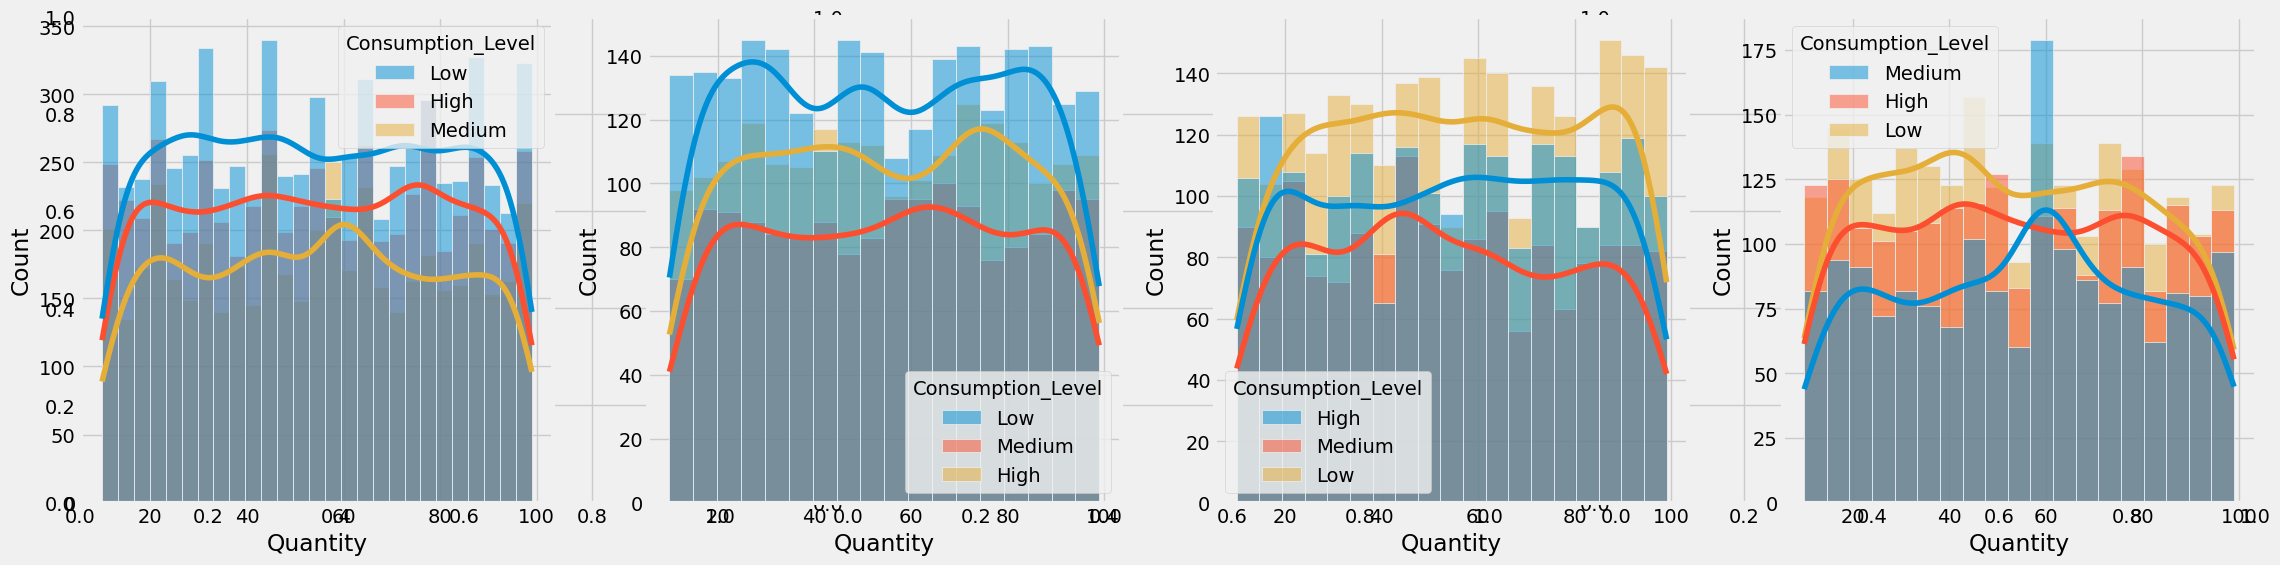

In [147]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='Quantity',kde=True,hue='Consumption_Level')
plt.subplot(142)
sns.histplot(data=df[df.Location=='Chicago'],x='Quantity',kde=True,hue='Consumption_Level')
plt.subplot(143)
sns.histplot(data=df[df.Location=='Los Angeles'],x='Quantity',kde=True,hue='Consumption_Level')
plt.subplot(144)
sns.histplot(data=df[df.Location=='New York'],x='Quantity',kde=True,hue='Consumption_Level')

plt.show()

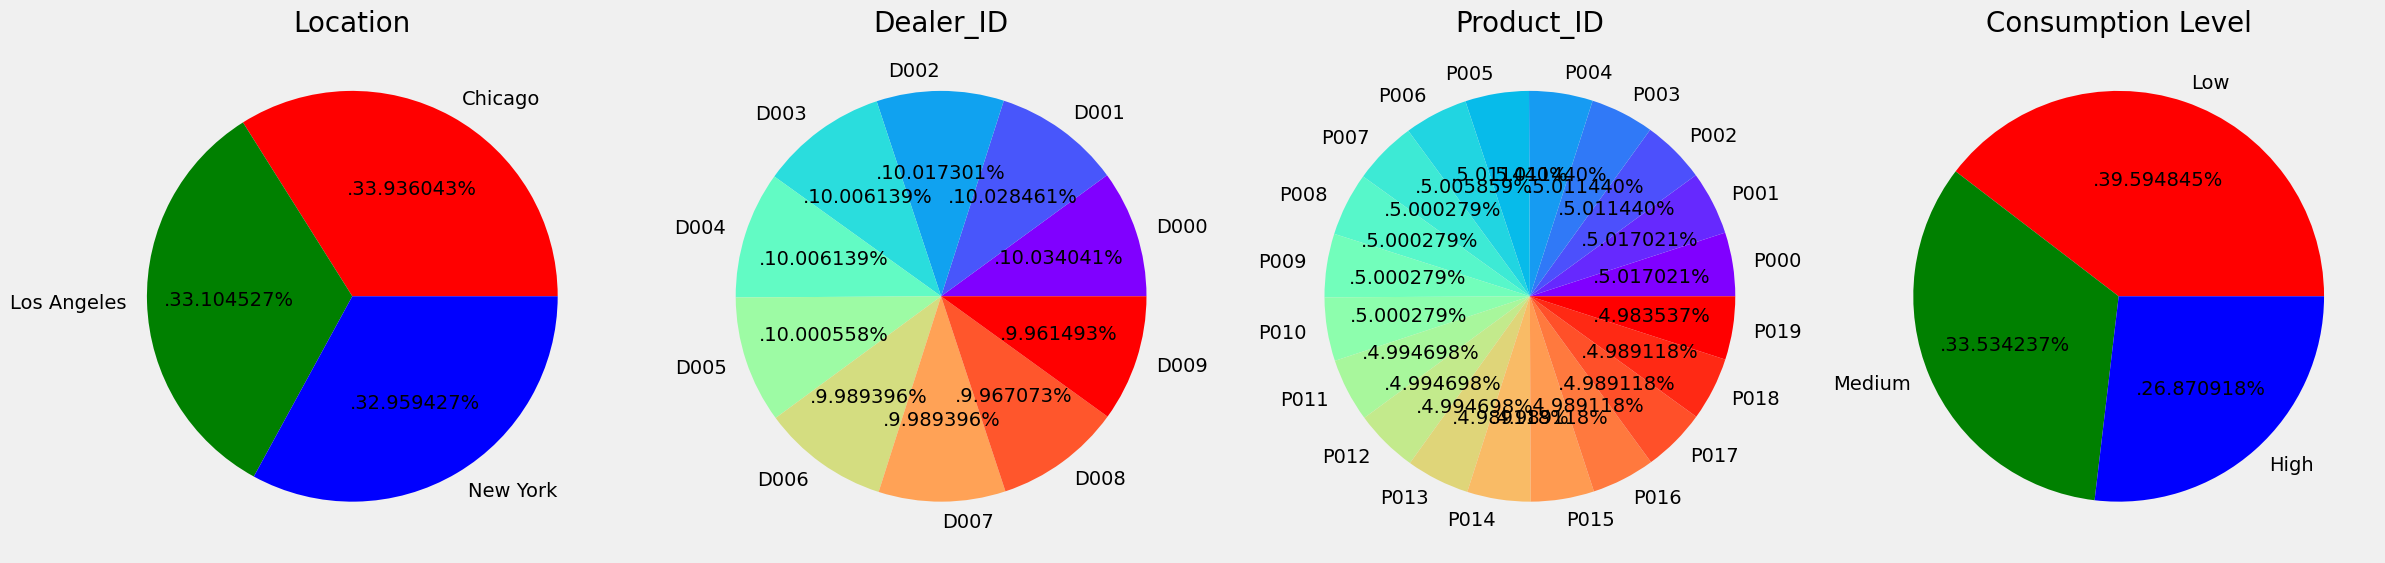

In [148]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['Location'].value_counts()
labels = 'Chicago', 'Los Angeles','New York'
color = ['red','green','blue']

plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Location', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 2)
size = df['Dealer_ID'].value_counts()
labels = 'D000', 'D001','D002','D003','D004','D005','D006','D007','D008','D009'
color = plt.cm.rainbow(np.linspace(0, 1, len(labels)))

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Dealer_ID', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 3)
size = df['Product_ID'].value_counts()
labels = 'P000', 'P001', 'P002', 'P003', 'P004', 'P005', 'P006', 'P007', 'P008', 'P009', 'P010', 'P011', 'P012', 'P013', 'P014', 'P015', 'P016', 'P017', 'P018', 'P019'
color = plt.cm.rainbow(np.linspace(0, 1, len(labels)))

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Product_ID', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 4)
size = df['Consumption_Level'].value_counts()
labels = 'Low', 'Medium','High'
color = ['red','green','blue']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Consumption Level', fontsize = 20)
plt.axis('off')

plt.tight_layout()
plt.grid()

plt.show()

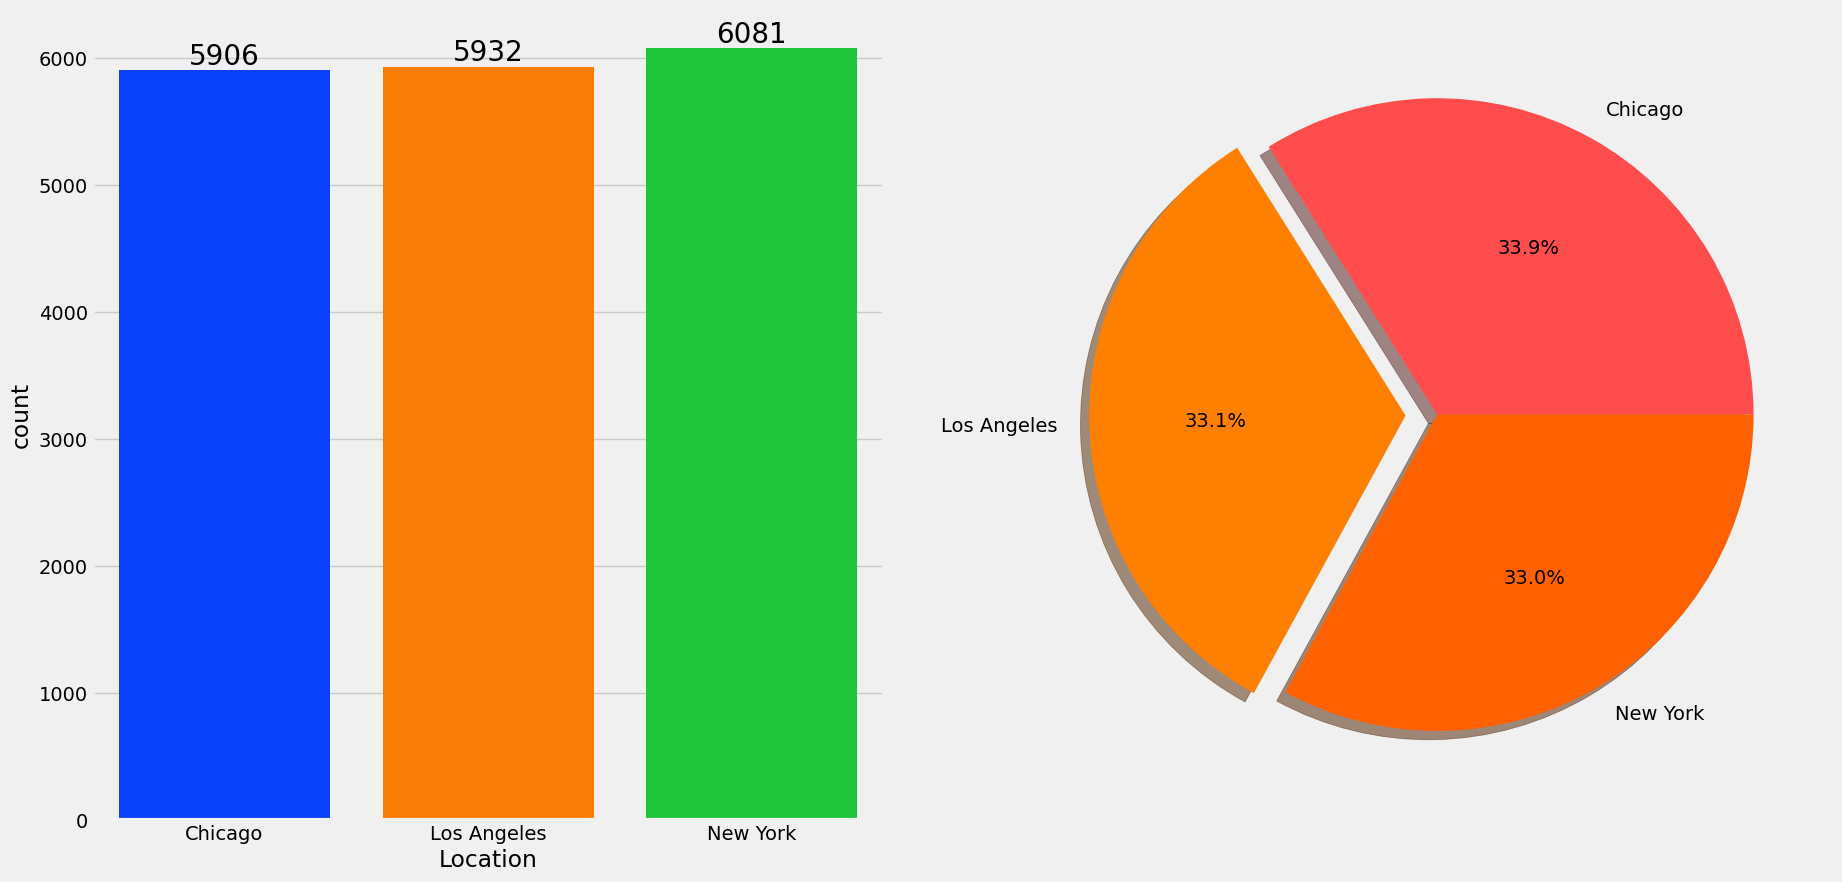

In [149]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['Location'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['Location'].value_counts(),labels=['Chicago','Los Angeles','New York'],explode=[0,0.1,0],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000','#ff6000'])
plt.show()

In [150]:
location_group = df.groupby('Location')
location_group

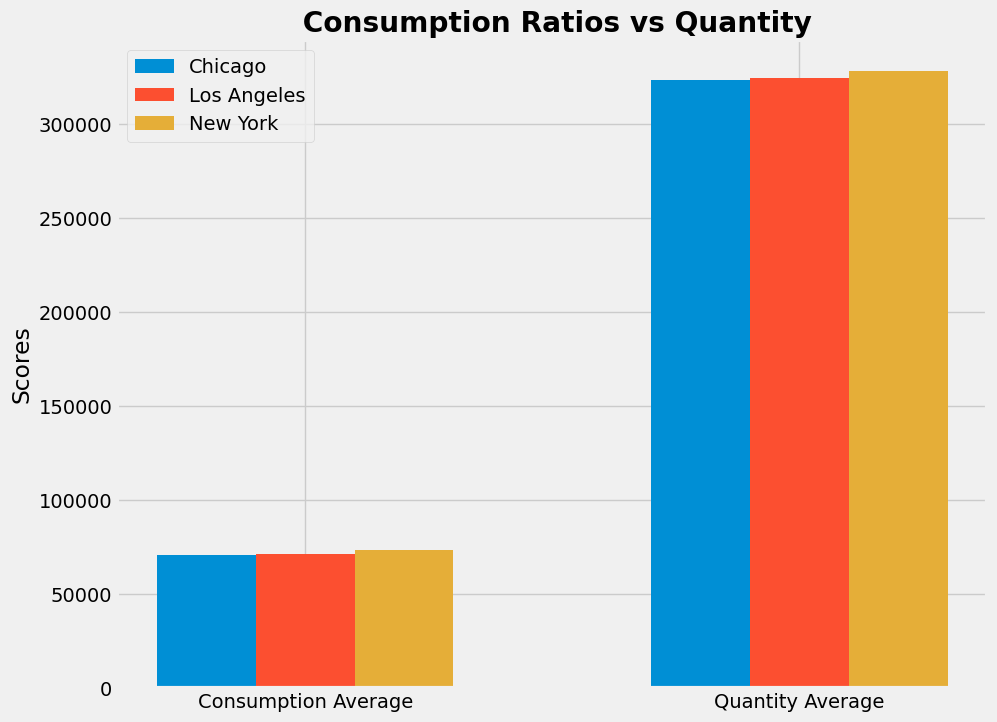

In [151]:
import numpy as np
import matplotlib.pyplot as plt

location_group = df.groupby('Location').sum()
chicago_scores = [
    location_group.loc['Chicago', 'Consumption'], 
    location_group.loc['Chicago', 'Quantity']
]
losangeles_scores = [
    location_group.loc['Los Angeles', 'Consumption'], 
    location_group.loc['Los Angeles', 'Quantity']
]
newyork_scores = [
    location_group.loc['New York', 'Consumption'], 
    location_group.loc['New York', 'Quantity']
]
plt.figure(figsize=(10, 8))

X = ['Consumption Average', 'Quantity Average']
X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, chicago_scores, 0.2, label='Chicago')
plt.bar(X_axis, losangeles_scores, 0.2, label='Los Angeles')
plt.bar(X_axis + 0.2, newyork_scores, 0.2, label='New York')

plt.xticks(X_axis, X)
plt.ylabel("Scores")
plt.title(" Consumption Ratios vs Quantity", fontweight='bold')

plt.legend()
plt.show()


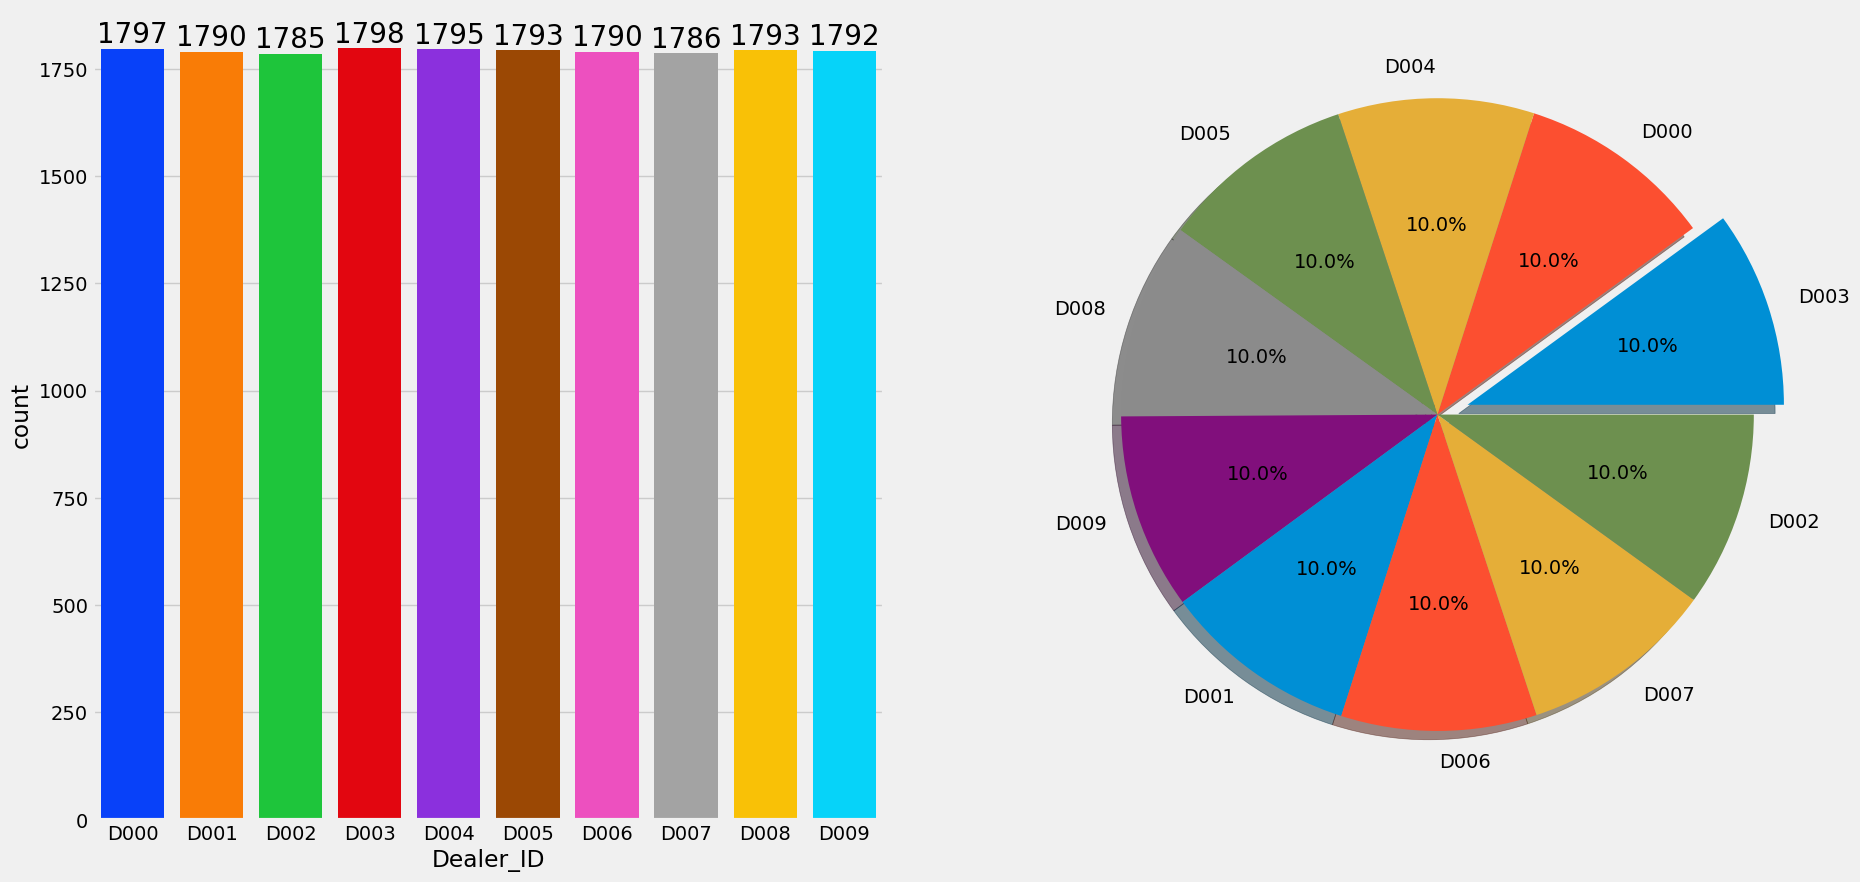

In [152]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['Dealer_ID'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['Dealer_ID'].value_counts(),labels=df['Dealer_ID'].value_counts().index,explode=[0.1,0,0,0,0,0,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show() 

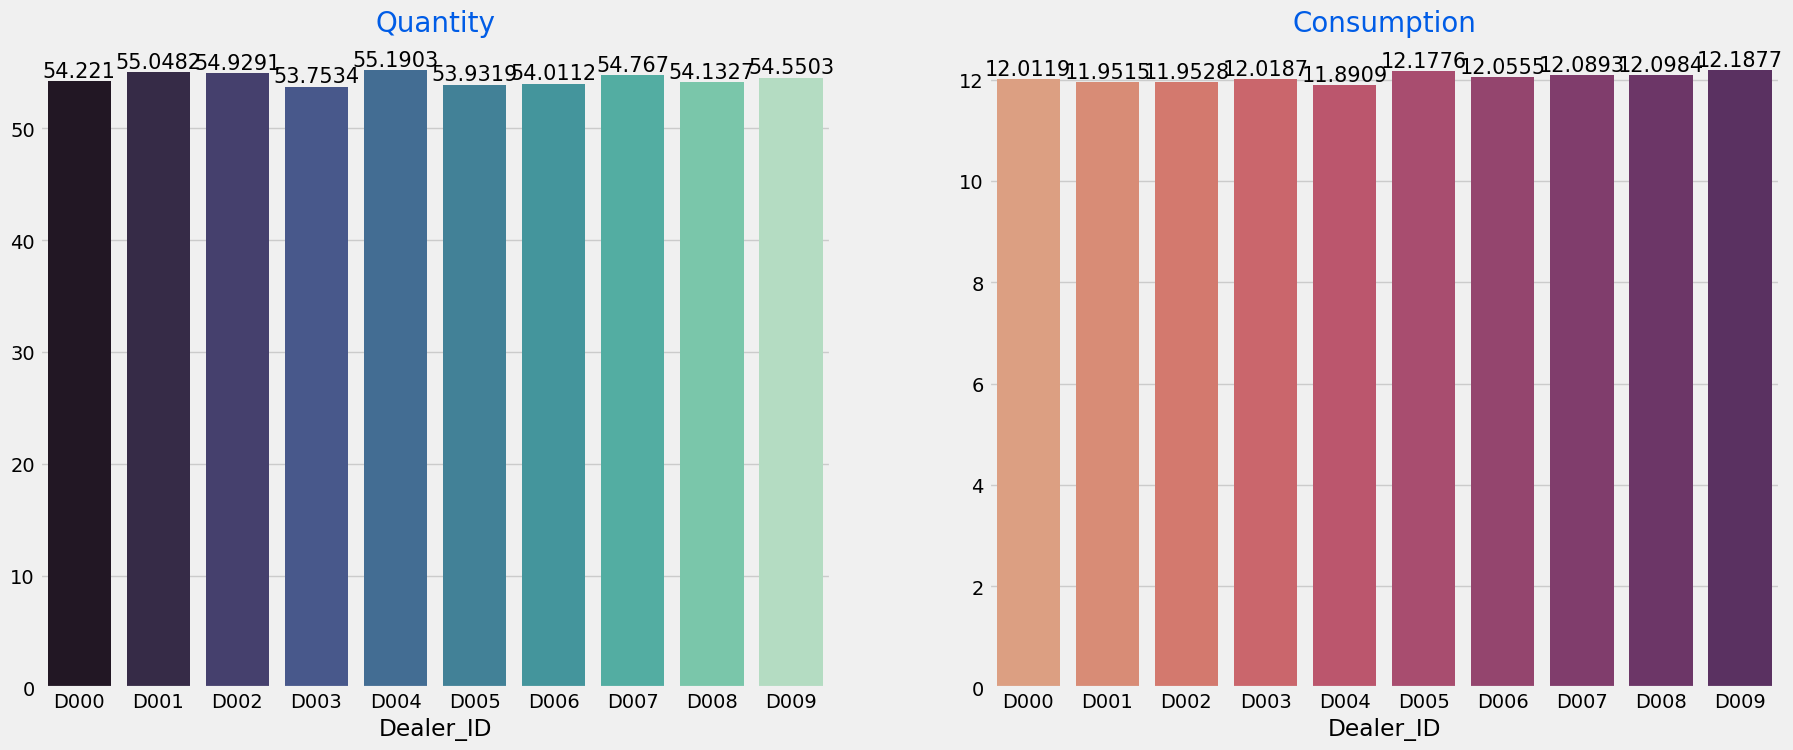

In [153]:
Group_data2=df.groupby('Dealer_ID')
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot(x=Group_data2['Quantity'].mean().index,y=Group_data2['Quantity'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Quantity',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['Consumption'].mean().index,y=Group_data2['Consumption'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Consumption',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)


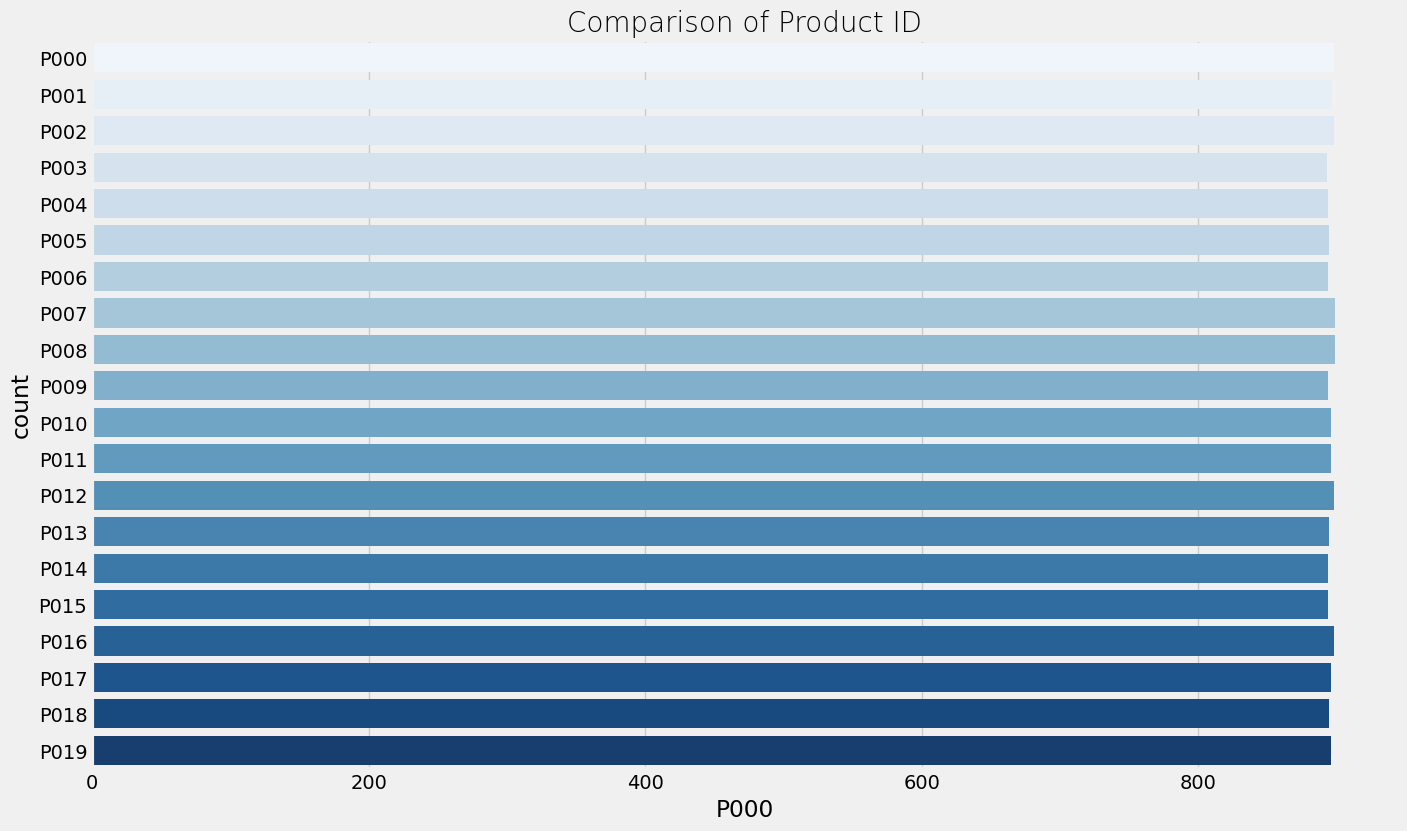

In [154]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['Product_ID'], palette = 'Blues')
plt.title('Comparison of Product ID', fontweight = 30, fontsize = 20)
plt.xlabel('P000')
plt.ylabel('count')
plt.show()

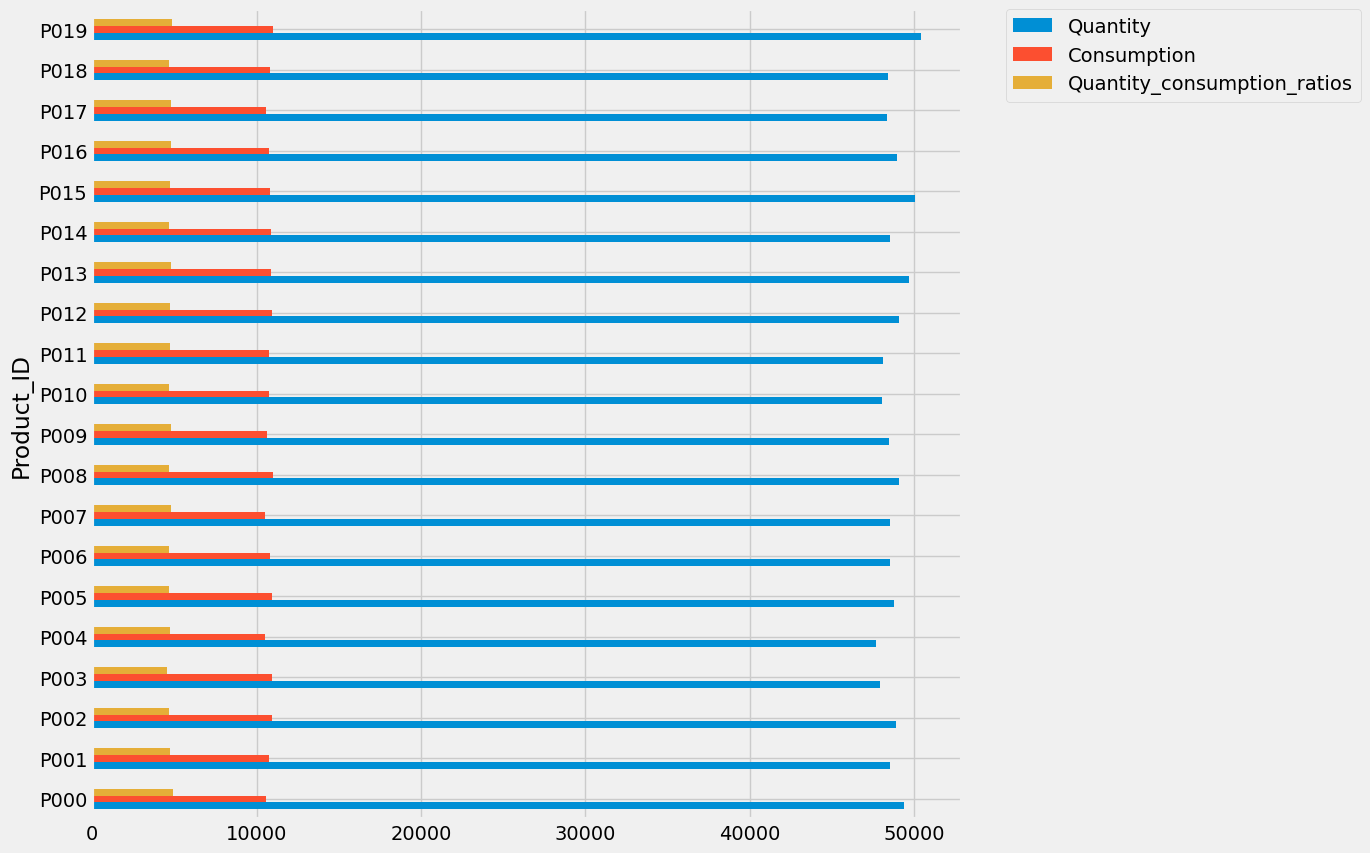

In [155]:
df.groupby('Product_ID').agg('sum').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [156]:
df.head()

,Dealer_ID,Product_ID,Date,Quantity,Consumption,Location,Consumption_Level,Quantity_consumption_ratios
0,D000,P000,2022-01-01,62.0,8.0,Chicago,Low,7.750000
1,D000,P000,2022-01-02,70.0,9.0,Chicago,Low,7.777778
2,D000,P000,2022-01-03,12.0,17.0,Los Angeles,High,0.705882
3,D000,P000,2022-01-04,74.0,13.0,Los Angeles,Medium,5.692308
4,D000,P000,2022-01-05,57.0,10.0,Los Angeles,Low,5.700000


In [157]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df['Dealer_ID'] = label_encoder.fit_transform(df['Dealer_ID'])
df['Product_ID'] = label_encoder.fit_transform(df['Product_ID'])
df['Location'] = label_encoder.fit_transform(df['Location'])
df['Consumption_Level'] = label_encoder.fit_transform(df['Consumption_Level'])

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df['Quantity'] = scaler.fit_transform(df[['Quantity']])  # Use double brackets to pass as DataFrame
df['Consumption'] = scaler.fit_transform(df[['Consumption']])

df = df.drop('Date',axis=1)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X= df.drop(['Consumption_Level','Quantity_consumption_ratios'],axis=1)
y= df['Consumption_Level']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=23)

clf = LogisticRegression(max_iter=10000, random_state=0)
clf.fit(X_train, y_train)
acc = accuracy_score(y_test, clf.predict(X_test)) * 100
print(f"Logistic Regression model accuracy: {acc:.2f}%")

from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
y_pred = clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
if len(set(y)) == 2:
    auc_score = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
    print(f"\nROC-AUC Score: {auc_score:.2f}")

from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
y_pred = clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
if len(set(y)) == 2:
    auc_score = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
    print(f"\nROC-AUC Score: {auc_score:.2f}")



Logistic Regression model accuracy: 100.00%
Confusion Matrix:
 [[1221    0    0]
 [   0 1342    0]
 [   0    0 1021]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1221
           1       1.00      1.00      1.00      1342
           2       1.00      1.00      1.00      1021

    accuracy                           1.00      3584
   macro avg       1.00      1.00      1.00      3584
weighted avg       1.00      1.00      1.00      3584

Confusion Matrix:
 [[1221    0    0]
 [   0 1342    0]
 [   0    0 1021]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1221
           1       1.00      1.00      1.00      1342
           2       1.00      1.00      1.00      1021

    accuracy                           1.00      3584
   macro avg       1.00      1.00      1.00      3584
weighted avg       1.00      1.00      1.00      35

In [158]:
new_data = pd.DataFrame({
    'Dealer_ID': ['D003'],
    'Product_ID': ['P010'],
     'Quantity': [50],
    'Consumption': [9], 
    'Location': ['Chicago']
   
})

for col in ['Dealer_ID', 'Product_ID', 'Location']:
    if new_data[col][0] in label_encoder.classes_:
        new_data[col] = label_encoder.fit_transform(new_data[col])
    else:
        new_data[col] = -1 

new_data['Quantity'] = scaler.fit_transform(new_data[['Quantity']])
new_data['Consumption'] = scaler.fit_transform(new_data[['Consumption']])

X_new = new_data[X_train.columns]
X_new_scaled = pd.DataFrame(X_new, columns=X_train.columns)
predicted_class = clf.predict(X_new_scaled)
predicted_proba = clf.predict_proba(X_new_scaled)

print(f"Predicted Consumption Level: {predicted_class[0]}")
print(f"Prediction Probabilities: {predicted_proba}")

Predicted Consumption Level: 2
Prediction Probabilities: [[9.89258279e-06 7.47251928e-04 9.99242855e-01]]
